<a href="https://colab.research.google.com/github/Aishwarya-RaviK/Linear-Regression-/blob/main/Linear_Regression8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

**TASK-1** mileage vs price.

In [ ]:
df = pd.read_csv("car_data.csv")

In [ ]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [ ]:
df.shape

(804, 12)

In [ ]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
X=df[['Mileage']]
y=df[['Price']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
from sklearn.preprocessing import StandardScaler 
scale=StandardScaler()
scale.fit(X_train)
X_train_scaled=scale.transform(X_train)
X_test_scaled=scale.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression 
reggressor=LinearRegression()
reggressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=reggressor.predict(X_test)

In [ ]:
reggressor.coef_

array([[-0.16766196]])

In [ ]:
reggressor.intercept_

array([24398.89335845])

The equation price = 24398.89 + (-0.1676)(Mileage)

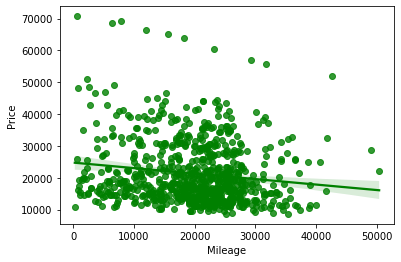

In [ ]:
import seaborn as sns 
ax=sns.regplot(x='Mileage',y='Price',data=df,color='green')

In [ ]:
from sklearn import metrics 
a=metrics.r2_score(y_test,y_pred)
print(a)

0.005981342067773565


**TASK-2** mileage, cylinders, liters, doors, cruise, sound, and leather

In [ ]:
X=df[['Mileage','Cylinder','Doors','Cruise','Sound','Leather']]

In [ ]:
y=df[['Price']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
from sklearn.preprocessing import StandardScaler 
scale=StandardScaler()
scale.fit(X_train)
X_train_scaled=scale.transform(X_train)
X_test_scaled=scale.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression 
reggressor=LinearRegression()
reggressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=reggressor.predict(X_test)

In [ ]:
reggressor.intercept_

array([7870.01329474])

In [ ]:
reggressor.coef_

array([[-1.73415219e-01,  3.02297933e+03, -1.27040721e+03,
         5.98554075e+03, -2.64752958e+03,  3.36987294e+03]])

features ------> 'Mileage','Cylinder','Doors','Cruise','Sound','Leather'

The equation is Price= 7870 + -1.73(Mileage)+3.02(cylinder)+(-1.27)(doors)+5.98(cruise)+(-2.64)(sound)+3.36(leather)

In [ ]:
from sklearn import metrics
a=metrics.r2_score(y_test,y_pred)
print(a)

0.4799289026757796


**TASK-3** Using One-Hot-Encoding

In [ ]:
df['Make'].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [ ]:
df['Model'].unique()

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [ ]:
df['Trim'].unique() # is like type and model so we just drop this feature

array(['Sedan 4D', 'CX Sedan 4D', 'CXL Sedan 4D', 'CXS Sedan 4D',
       'Custom Sedan 4D', 'Limited Sedan 4D', 'Special Ed Ultra 4D',
       'DHS Sedan 4D', 'DTS Sedan 4D', 'Hardtop Conv 2D',
       'LS Hatchback 4D', 'LS Sedan 4D', 'LT Hatchback 4D', 'LT Sedan 4D',
       'SVM Hatchback 4D', 'SVM Sedan 4D', 'Coupe 2D', 'LS Coupe 2D',
       'LS Sport Coupe 2D', 'LS Sport Sedan 4D', 'Conv 2D', 'SS Sedan 4D',
       'LS MAXX Hback 4D', 'LT MAXX Hback 4D', 'MAXX Hback 4D',
       'LT Coupe 2D', 'SS Coupe 2D', 'GXP Sedan 4D', 'SE Sedan 4D',
       'SLE Sedan 4D', 'GT Sedan 4D', 'GT Coupe 2D', 'GTP Sedan 4D',
       'AWD Sportwagon 4D', 'GT Sportwagon', 'Sportwagon 4D',
       'Linear Conv 2D', 'Linear Sedan 4D', 'Aero Conv 2D',
       'Aero Sedan 4D', 'Arc Conv 2D', 'Arc Sedan 4D', 'Arc Wagon 4D',
       'Linear Wagon 4D', 'Aero Wagon 4D', 'Quad Coupe 2D',
       'L300 Sedan 4D'], dtype=object)

In [ ]:
df['Type'].unique()

array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

In [ ]:
encoded_data = pd.get_dummies(df, columns = ['Make','Model','Type'])

In [ ]:
encoded_data.head()

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
encoded_data.columns

Index(['Price', 'Mileage', 'Trim', 'Cylinder', 'Liter', 'Doors', 'Cruise',
       'Sound', 'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon'],
      dtype='object')

In [ ]:
cols=['Mileage','Cylinder', 'Liter', 'Doors', 'Cruise',
       'Sound', 'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon']
X=encoded_data[cols]

In [ ]:
y=encoded_data[['Price']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
from sklearn.preprocessing import StandardScaler 
scale=StandardScaler()
scale.fit(X_train)
X_train_scaled=scale.transform(X_train)
X_test_scaled=scale.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression 
reggressor=LinearRegression()
reggressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=reggressor.predict(X_test)

In [ ]:
reggressor.intercept_

array([25048.79340379])

In [ ]:
reggressor.coef_

array([[-1.78517591e-01,  4.63534152e+02,  1.54017144e+03,
        -1.34438541e+03, -4.80534698e+01,  2.48539763e+02,
         3.58354297e+02, -3.19152283e+03,  1.29830728e+04,
        -4.99835058e+03, -4.70881295e+03,  4.83884490e+03,
        -4.92323135e+03, -2.45438768e+03,  3.21198470e+02,
         1.50675067e+03,  3.49530386e+03,  1.96997957e+03,
        -4.70668879e+03,  1.82424074e+02,  3.75236615e+03,
        -6.37949839e+03, -3.91023289e+03, -4.52193989e+03,
        -2.66630524e+03, -2.70729459e+03,  1.15414997e+04,
        -3.70777116e+03,  2.37070969e+02,  4.99152616e+03,
        -3.91918847e+03, -1.48419419e+03,  4.72307660e+02,
        -2.56014863e+03, -2.36308272e+03,  2.02452662e+02,
        -1.35449699e+03, -2.50275262e+03, -5.18883763e+02,
         2.48246138e+03,  3.41557097e+02,  3.03269744e+03,
        -4.30809765e+03, -4.08353838e+02,  1.59437217e+04,
         3.52974403e+03, -2.85755132e+03, -2.25859579e+02,
        -4.75549661e+02,  2.92165363e+01]])

In [ ]:
from sklearn import metrics

In [ ]:
a=metrics.r2_score(y_test,y_pred)
print(a)

0.9803290306912582


Features ------->>>> Mileage','Cylinder', 'Liter', 'Doors', 'Cruise',
       'Sound', 'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon'

Coefficients ------>>>> -1.78517591e-01,  4.63534152e+02,  1.54017144e+03,
        -1.34438541e+03, -4.80534698e+01,  2.48539763e+02,
         3.58354297e+02, -3.19152283e+03,  1.29830728e+04,
        -4.99835058e+03, -4.70881295e+03,  4.83884490e+03,
        -4.92323135e+03, -2.45438768e+03,  3.21198470e+02,
         1.50675067e+03,  3.49530386e+03,  1.96997957e+03,
        -4.70668879e+03,  1.82424074e+02,  3.75236615e+03,
        -6.37949839e+03, -3.91023289e+03, -4.52193989e+03,
        -2.66630524e+03, -2.70729459e+03,  1.15414997e+04,
        -3.70777116e+03,  2.37070969e+02,  4.99152616e+03,
        -3.91918847e+03, -1.48419419e+03,  4.72307660e+02,
        -2.56014863e+03, -2.36308272e+03,  2.02452662e+02,
        -1.35449699e+03, -2.50275262e+03, -5.18883763e+02,
         2.48246138e+03,  3.41557097e+02,  3.03269744e+03,
        -4.30809765e+03, -4.08353838e+02,  1.59437217e+04,
         3.52974403e+03, -2.85755132e+03, -2.25859579e+02,
        -4.75549661e+02,  2.92165363e+01

In [ ]:
features=['Mileage','Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD', 'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO', 'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier', 'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette', 'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am', 'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series', 'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo', 'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire', 'Model_Vibe', 'Model_XLR-V8', 'Type_Convertible', 'Type_Coupe', 'Type_Hatchback', 'Type_Sedan', 'Type_Wagon']

In [ ]:
coeff=[-1.78517591e-01, 4.63534152e+02, 1.54017144e+03, -1.34438541e+03, -4.80534698e+01, 2.48539763e+02, 3.58354297e+02, -3.19152283e+03, 1.29830728e+04, -4.99835058e+03, -4.70881295e+03, 4.83884490e+03, -4.92323135e+03, -2.45438768e+03, 3.21198470e+02, 1.50675067e+03, 3.49530386e+03, 1.96997957e+03, -4.70668879e+03, 1.82424074e+02, 3.75236615e+03, -6.37949839e+03, -3.91023289e+03, -4.52193989e+03, -2.66630524e+03, -2.70729459e+03, 1.15414997e+04, -3.70777116e+03, 2.37070969e+02, 4.99152616e+03, -3.91918847e+03, -1.48419419e+03, 4.72307660e+02, -2.56014863e+03, -2.36308272e+03, 2.02452662e+02, -1.35449699e+03, -2.50275262e+03, -5.18883763e+02, 2.48246138e+03, 3.41557097e+02, 3.03269744e+03, -4.30809765e+03, -4.08353838e+02, 1.59437217e+04, 3.52974403e+03, -2.85755132e+03, -2.25859579e+02, -4.75549661e+02, 2.92165363e+01]

In [ ]:
tab=pd.DataFrame(features,coeff)

In [ ]:
tab

,0
-0.178518,Mileage
463.534152,Cylinder
1540.171440,Liter
-1344.385410,Doors
-48.053470,Cruise
248.539763,Sound
358.354297,Leather
-3191.522830,Make_Buick
12983.072800,Make_Cadillac
-4998.350580,Make_Chevrolet
